# Range 10

Plot saved to C:\Users\Kaan\Pictures\thesis\naming\heatmap_gemini_cat3_r10_gen.png


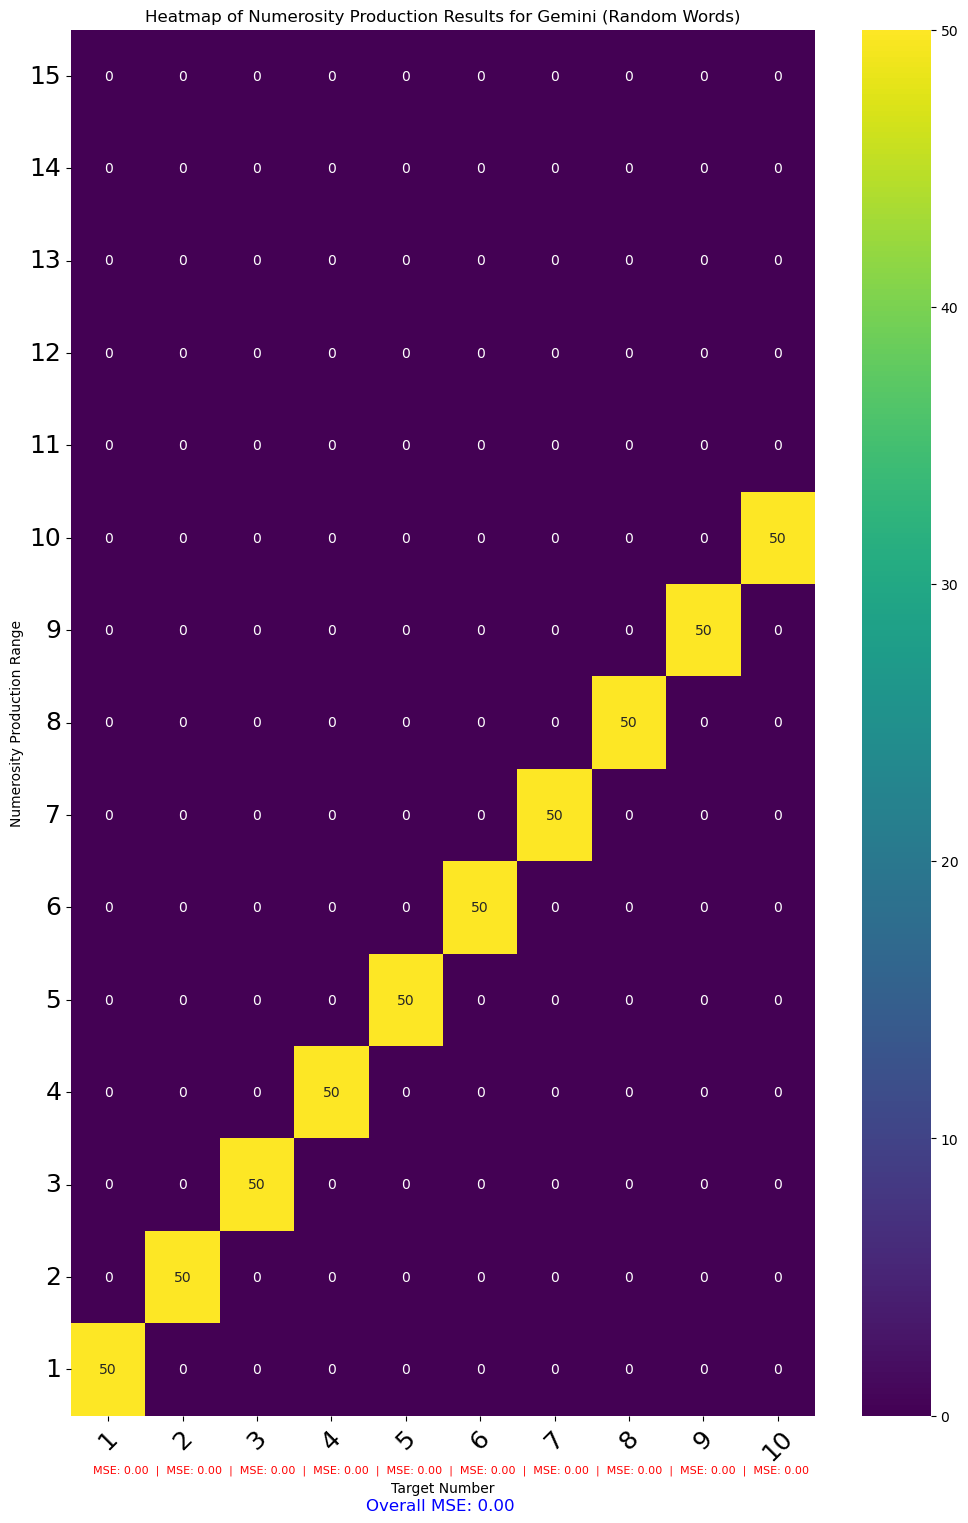

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

def create_and_save_binned_heatmap_with_mse(file_path, title, save_directory, cat):
    # Read the data from the CSV file
    data = pd.read_csv(file_path, index_col=0)

    mse_values = {}
    for col in data.columns:
        col_values = data[col].dropna()
        mse_values[int(col)] = np.mean((col_values - int(col))**2)
    
    # Filter out values greater than 200
    data = data.applymap(lambda x: x if x <= 15 else None)

    # Define bins and bin labels
    bins = range(0, 16, 1)  # Create bins: 0–10, 10–20, ..., 190–200
    bin_labels = [f"{i+1}" for i in bins[:-1]]  # Labels for each bin (e.g., "0-10", "10-20")

    # Initialize a DataFrame to store binned frequency counts
    binned_frequency_data = pd.DataFrame(0, index=bin_labels, columns=data.columns)

    # Populate binned frequency counts
    for col in data.columns:
        col_values = data[col].dropna()
        binned_counts = pd.cut(col_values, bins=bins, labels=bin_labels, include_lowest=True).value_counts()
        for bin_label, count in binned_counts.items():
            binned_frequency_data.loc[bin_label, col] = count

    # Reverse the order of rows to flip the y-axis
    binned_frequency_data = binned_frequency_data.iloc[::-1]

    # Calculate total MSE
    total_mse = np.mean(list(mse_values.values()))

    # Create the heatmap
    plt.figure(figsize=(12, 18))
    ax = sns.heatmap(binned_frequency_data, annot=True, fmt="d", yticklabels=binned_frequency_data.index , cmap="viridis")
    ax.tick_params(axis='both', which='major', labelsize=18)
    plt.xlabel('Target Number', labelpad=12)
    plt.ylabel('Numerosity Production Range')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

    # Determine the bottom-right position for the annotations
    x_label_pos = ax.get_position().x0 + ax.get_position().width  # Right edge of the plot
    y_label_pos = ax.get_position().y0 - 0.05  # Just below the x-labels

    # Display individual MSEs
    mse_text = "  |  ".join([f"MSE: {mse_values[target]:.2f}" for target in data.columns.astype(int)])
    plt.figtext(x_label_pos - 0.005, y_label_pos + 0.02, mse_text, ha="right", va="center", fontsize=8, color="red")

    # Display total MSE below the individual MSEs
    plt.figtext(x_label_pos - 0.25, y_label_pos , f"Overall MSE: {total_mse:.2f}", ha="right", va="center", fontsize=12, color="blue")

    # Save the plot to the specified directory
    if not os.path.exists(save_directory):
        os.makedirs(save_directory)  # Create the directory if it doesn't exist

    # Generate a file name based on the title or file path
    file_name = "heatmap_gemini_cat" + str(cat)+ "_r10_gen.png"
    save_path = os.path.join(save_directory, file_name)

    plt.savefig(save_path, bbox_inches="tight")
    print(f"Plot saved to {save_path}")

    # Show the plot
    plt.show()

cat = 3

if cat == 0:
    task = 'Letter A'
elif cat == 1:
    task = 'Random Letters'
elif cat == 2:
     task = 'Word CAT'
else:
    task = 'Random Words'

# Example Usage
file_path = r"C:\Users\Kaan\Desktop\thesis\csv_files_proprietary\gemini_cat"+ str(cat) +"_r10_gen_data.csv"  # Replace with the path to your CSV file
save_directory = r"C:\Users\Kaan\Pictures\thesis\naming"  # Replace with the path to the directory where you want to save the plot
create_and_save_binned_heatmap_with_mse(file_path, 'Heatmap of Numerosity Production Results for Gemini (' + task +')', save_directory, cat)


## Violin Plot

Plot saved to C:\Users\Kaan\Pictures\thesis\generated\violin_mistral_cat3_r100_naming.png


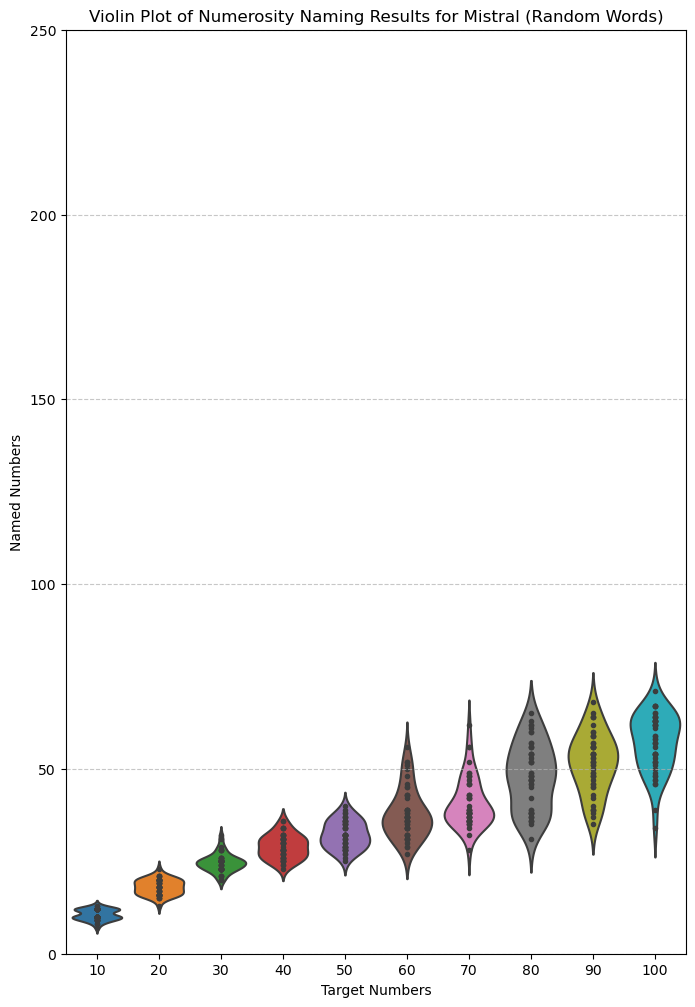

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_and_show_violin_plot(file_path, rng, cat, save_directory):
    # Read the data from the CSV file
    data = pd.read_csv(file_path, index_col=0)

    if rng == 10:
        lim = 15
    else:
        lim = 250
    
    data = data.applymap(lambda x: x if x <= lim else None)

    if cat == 0:
        task = 'Letter A'
    elif cat == 1:
        task = 'Random Letters'
    elif cat == 2:
        task = 'Word CAT'
    else:
        task = 'Random Words'
    
    # Melt the DataFrame to prepare for plotting
    melted_data = data.melt(var_name="Target Numbers", value_name="Generated Numbers").dropna()

    # Create the violin plot
    plt.figure(figsize=(8, 12))
    sns.violinplot(
        x="Target Numbers",
        y="Generated Numbers",
        data=melted_data,
        scale="count",
        inner="point",
        bw=0.5
    )


    plt.title('Violin Plot of Numerosity Naming Results for Mistral (' + task + ')')
    plt.xlabel("Target Numbers")
    plt.ylabel("Named Numbers")
    plt.ylim(0, lim)  # Ensure y-axis ranges from 1 to 15
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Save the plot to the specified directory
    if not os.path.exists(save_directory):
        os.makedirs(save_directory)  # Create the directory if it doesn't exist

    # Generate a file name based on the title or file path
    file_name = "violin_mistral_cat" + str(cat) + "_r"+ str(rng) +"_naming.png"
    save_path = os.path.join(save_directory, file_name)

    plt.savefig(save_path, bbox_inches="tight")
    print(f"Plot saved to {save_path}")
    # Show the violin plot
    plt.show()

cat = 3
rng = 100
file_path = r"C:\Users\Kaan\Desktop\thesis\excel files\mistral_cat"+str(cat)+"_r"+str(rng)+"_naming_data.csv"  # Replace with the path to your CSV file
save_directory = r"C:\Users\Kaan\Pictures\thesis\generated" 
create_and_show_violin_plot(file_path, rng, cat, save_directory)

# Range 100

Plot saved to C:\Users\Kaan\Pictures\thesis\generated\heatmap_gemini_cat3_r100_naming.png


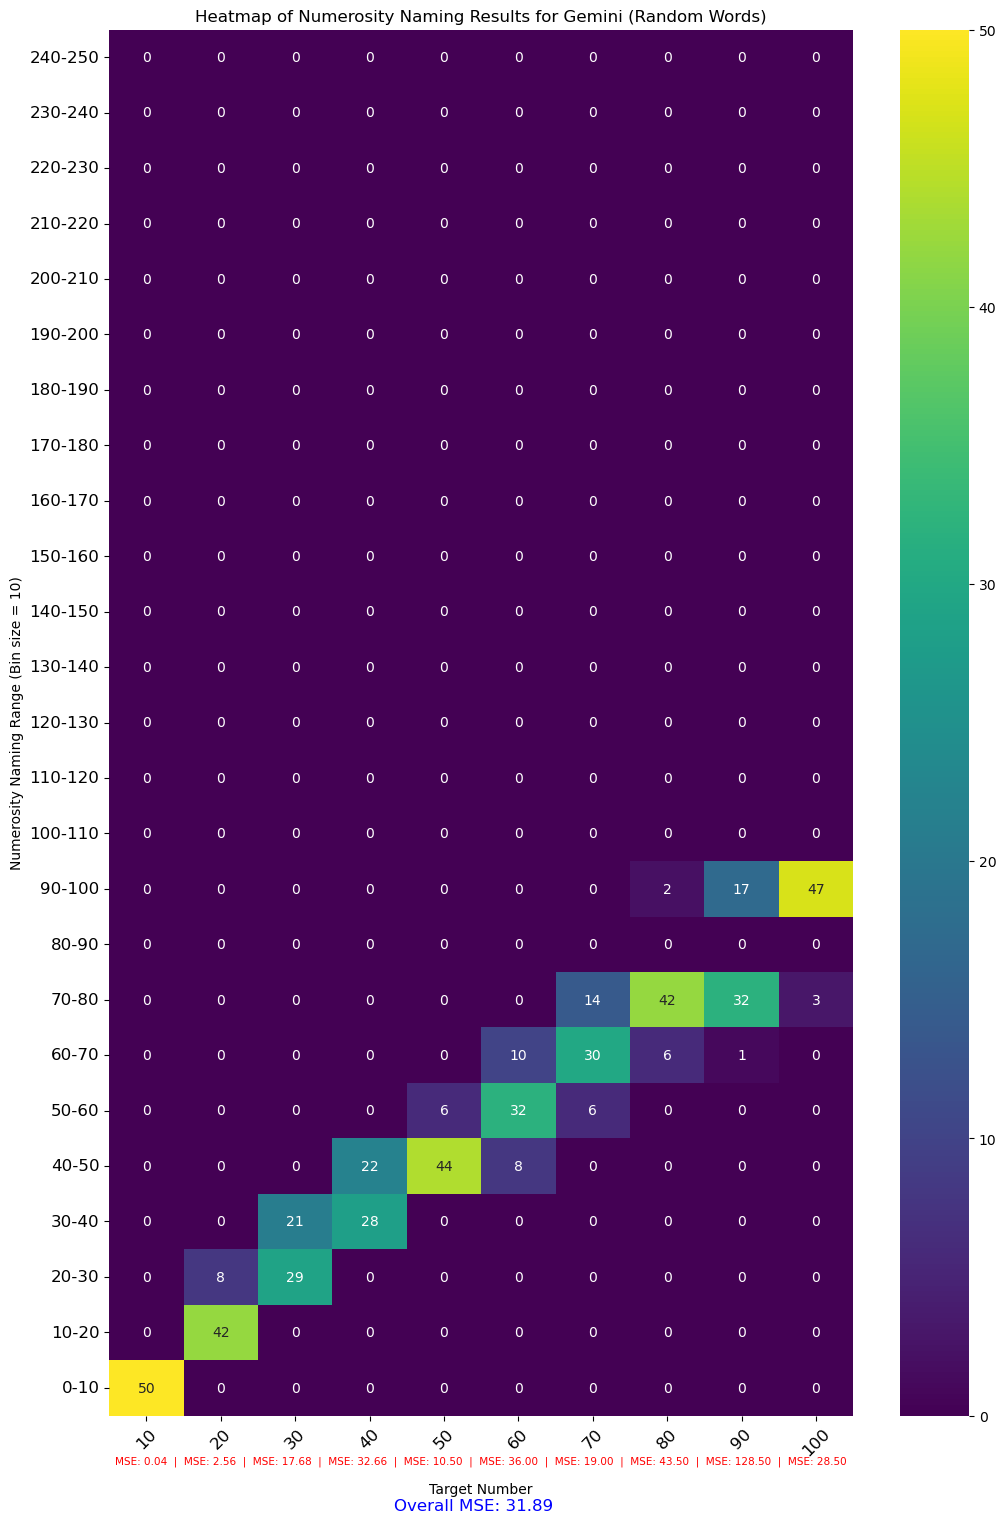

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def create_and_save_binned_heatmap_with_mse(file_path, title, save_directory, cat):
    # Read the data from the CSV file
    data = pd.read_csv(file_path, index_col=0)
    
    mse_values = {}
    for col in data.columns:
        col_values = data[col].dropna()
        mse_values[int(col)] = np.mean((col_values - int(col))**2)

    # Filter out values greater than 200
    data = data.applymap(lambda x: x if x <= 250 else None)

    # Define bins and bin labels
    bins = range(0, 251, 10)  # Create bins: 0–10, 10–20, ..., 190–200
    bin_labels = [f"{i}-{i+10}" for i in bins[:-1]]  # Labels for each bin (e.g., "0-10", "10-20")

    # Initialize a DataFrame to store binned frequency counts
    binned_frequency_data = pd.DataFrame(0, index=bin_labels, columns=data.columns)

    # Populate binned frequency counts
    for col in data.columns:
        col_values = data[col].dropna()
        binned_counts = pd.cut(col_values, bins=bins, labels=bin_labels, include_lowest=True).value_counts()
        for bin_label, count in binned_counts.items():
            binned_frequency_data.loc[bin_label, col] = count

    # Reverse the order of rows to flip the y-axis
    binned_frequency_data = binned_frequency_data.iloc[::-1]

    # Calculate total MSE
    total_mse = np.mean(list(mse_values.values()))

    # Create the heatmap
    plt.figure(figsize=(12, 18))
    ax = sns.heatmap(binned_frequency_data, annot=True, fmt="d", yticklabels=binned_frequency_data.index , cmap="viridis")
    ax.tick_params(axis='both', which='major', labelsize=12)
    plt.xlabel('Target Number', labelpad=17)
    plt.ylabel('Numerosity Naming Range (Bin size = 10)')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

    # Determine the bottom-right position for the annotations
    x_label_pos = ax.get_position().x0 + ax.get_position().width  # Right edge of the plot
    y_label_pos = ax.get_position().y0 - 0.05  # Just below the x-labels

    # Display individual MSEs
    mse_text = "  |  ".join([f"MSE: {mse_values[target]:.2f}" for target in data.columns.astype(int)])
    plt.figtext(x_label_pos - 0.005, y_label_pos + 0.025, mse_text, ha="right", va="center", fontsize=7.5, color="red")

    # Display total MSE below the individual MSEs
    plt.figtext(x_label_pos - 0.25, y_label_pos , f"Overall MSE: {total_mse:.2f}", ha="right", va="center", fontsize=12, color="blue")

    # Save the plot to the specified directory
    if not os.path.exists(save_directory):
        os.makedirs(save_directory)  # Create the directory if it doesn't exist

    # Generate a file name based on the title or file path
    file_name = "heatmap_gemini_cat" + str(cat)+ "_r100_naming.png"
    save_path = os.path.join(save_directory, file_name)

    plt.savefig(save_path, bbox_inches="tight")
    print(f"Plot saved to {save_path}")

    # Show the plot
    plt.show()

cat = 2

if cat == 0:
    task = 'Letter A'
elif cat == 1:
    task = 'Random Letters'
elif cat == 2:
     task = 'Word CAT'
else:
    task = 'Random Words'

# Example Usage
file_path = r"C:\Users\Kaan\Desktop\thesis\csv_files_proprietary\gemini_cat"+ str(cat) +"_r100_naming_data.csv"  # Replace with the path to your CSV file
save_directory = r"C:\Users\Kaan\Pictures\thesis\generated"  # Replace with the path to the directory where you want to save the plot
create_and_save_binned_heatmap_with_mse(file_path, 'Heatmap of Numerosity Naming Results for Gemini (' + task +')', save_directory, cat)


In [56]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

TASK_NAMES = {
    0: "Letter A",
    1: "Random Letters",
    2: "Word CAT",
    3: "Random Words"
}

def create_violin_plot_data(file_path):
    """
    Process CSV file to collect target and generated values for violin plots.
    Only include values less than 250.
    """
    data = pd.read_csv(file_path, index_col=0)
    violin_data = []
    for col in data.columns:  # Iterate through targets
        col_values = data[col].dropna()
        target_number = int(col)
        for value in col_values:
            if value < 250:  # Filter values less than 250
                violin_data.append({"Target": target_number, "Generated": value})
    return pd.DataFrame(violin_data)

def generate_combined_violin_plots(input_directory, save_path):
    """
    Generate combined violin plot grid with models as rows and categories as columns.
    Scale y-axis from 0 to 250.
    """
    file_pattern = re.compile(r"([a-zA-Z0-9]+)_cat(\d+)_r100_n_data.*\.csv")
    model_order = ["mistral", "llama8b", "llama70b", "gemini", "gpt4o"]
    categories = set()
    violin_data_results = {}

    # Process all CSV files
    for file in os.listdir(input_directory):
        if file.endswith(".csv") and "r100" in file:
            match = file_pattern.match(file)
            if match:
                model, cat = match.groups()
                category = int(cat)
                file_path = os.path.join(input_directory, file)
                violin_data = create_violin_plot_data(file_path)

                if model not in violin_data_results:
                    violin_data_results[model] = {}
                violin_data_results[model][category] = violin_data
                categories.add(category)

    # Grid setup
    categories = sorted(categories)
    models = [m for m in model_order if m in violin_data_results]
    num_rows, num_cols = len(models), len(categories)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10 * num_cols, 10 * num_rows))

    for i, model in enumerate(models):
        for j, category in enumerate(categories):
            ax = axes[i, j] if num_rows > 1 else axes[j]
            if category in violin_data_results[model]:
                df = violin_data_results[model][category]
                sns.violinplot(x="Target", y="Generated", data=df, ax=ax, inner="point", color="skyblue")
                ax.set_ylim(0, 250)  # Set y-axis scale from 0 to 250
                ax.set_box_aspect(2.5)
                ax.set_xlabel("Target Numbers", fontsize=16)
                ax.set_ylabel("Generated Numbers", fontsize=16)
                ax.tick_params(axis='both', which='major', labelsize=20)
            else:
                ax.axis("off")

    for ax, col in zip(axes[0], categories):
        ax.annotate(TASK_NAMES[col], xy=(0.5, 1.1), xycoords="axes fraction",
                    ha="center", fontsize=20, fontweight="bold")
    for ax, row in zip(axes[:, 0], models):
        ax.annotate(row.upper(), xy=(-0.7, 0.5), xycoords="axes fraction",
                    ha="center", va="center", rotation=90, fontsize=20, fontweight="bold")

    plt.suptitle("Numerosity Production Results: Range 100", fontsize=24, fontweight="bold", x=0.55, y=1.01)
    plt.tight_layout()
    plt.subplots_adjust(left=0.2, right=0.95, hspace=0.2, wspace=0.2)
    plt.savefig(save_path, bbox_inches="tight")
    print(f"Violin plot grid saved to {save_path}")
    plt.show()

# Run the violin plot function
if __name__ == "__main__":
    input_directory = r"C:\Users\Kaan\Desktop\thesis\csv_files"
    output_path = r"C:\Users\Kaan\Pictures\thesis\r100_prop_gen_violin.png"
    generate_combined_violin_plots(input_directory, output_path)


ValueError: Number of rows must be a positive integer, not 0

<Figure size 0x0 with 0 Axes>

Binned heatmap grid saved to C:\Users\Kaan\Pictures\thesis\r100_naming_heatmap.png


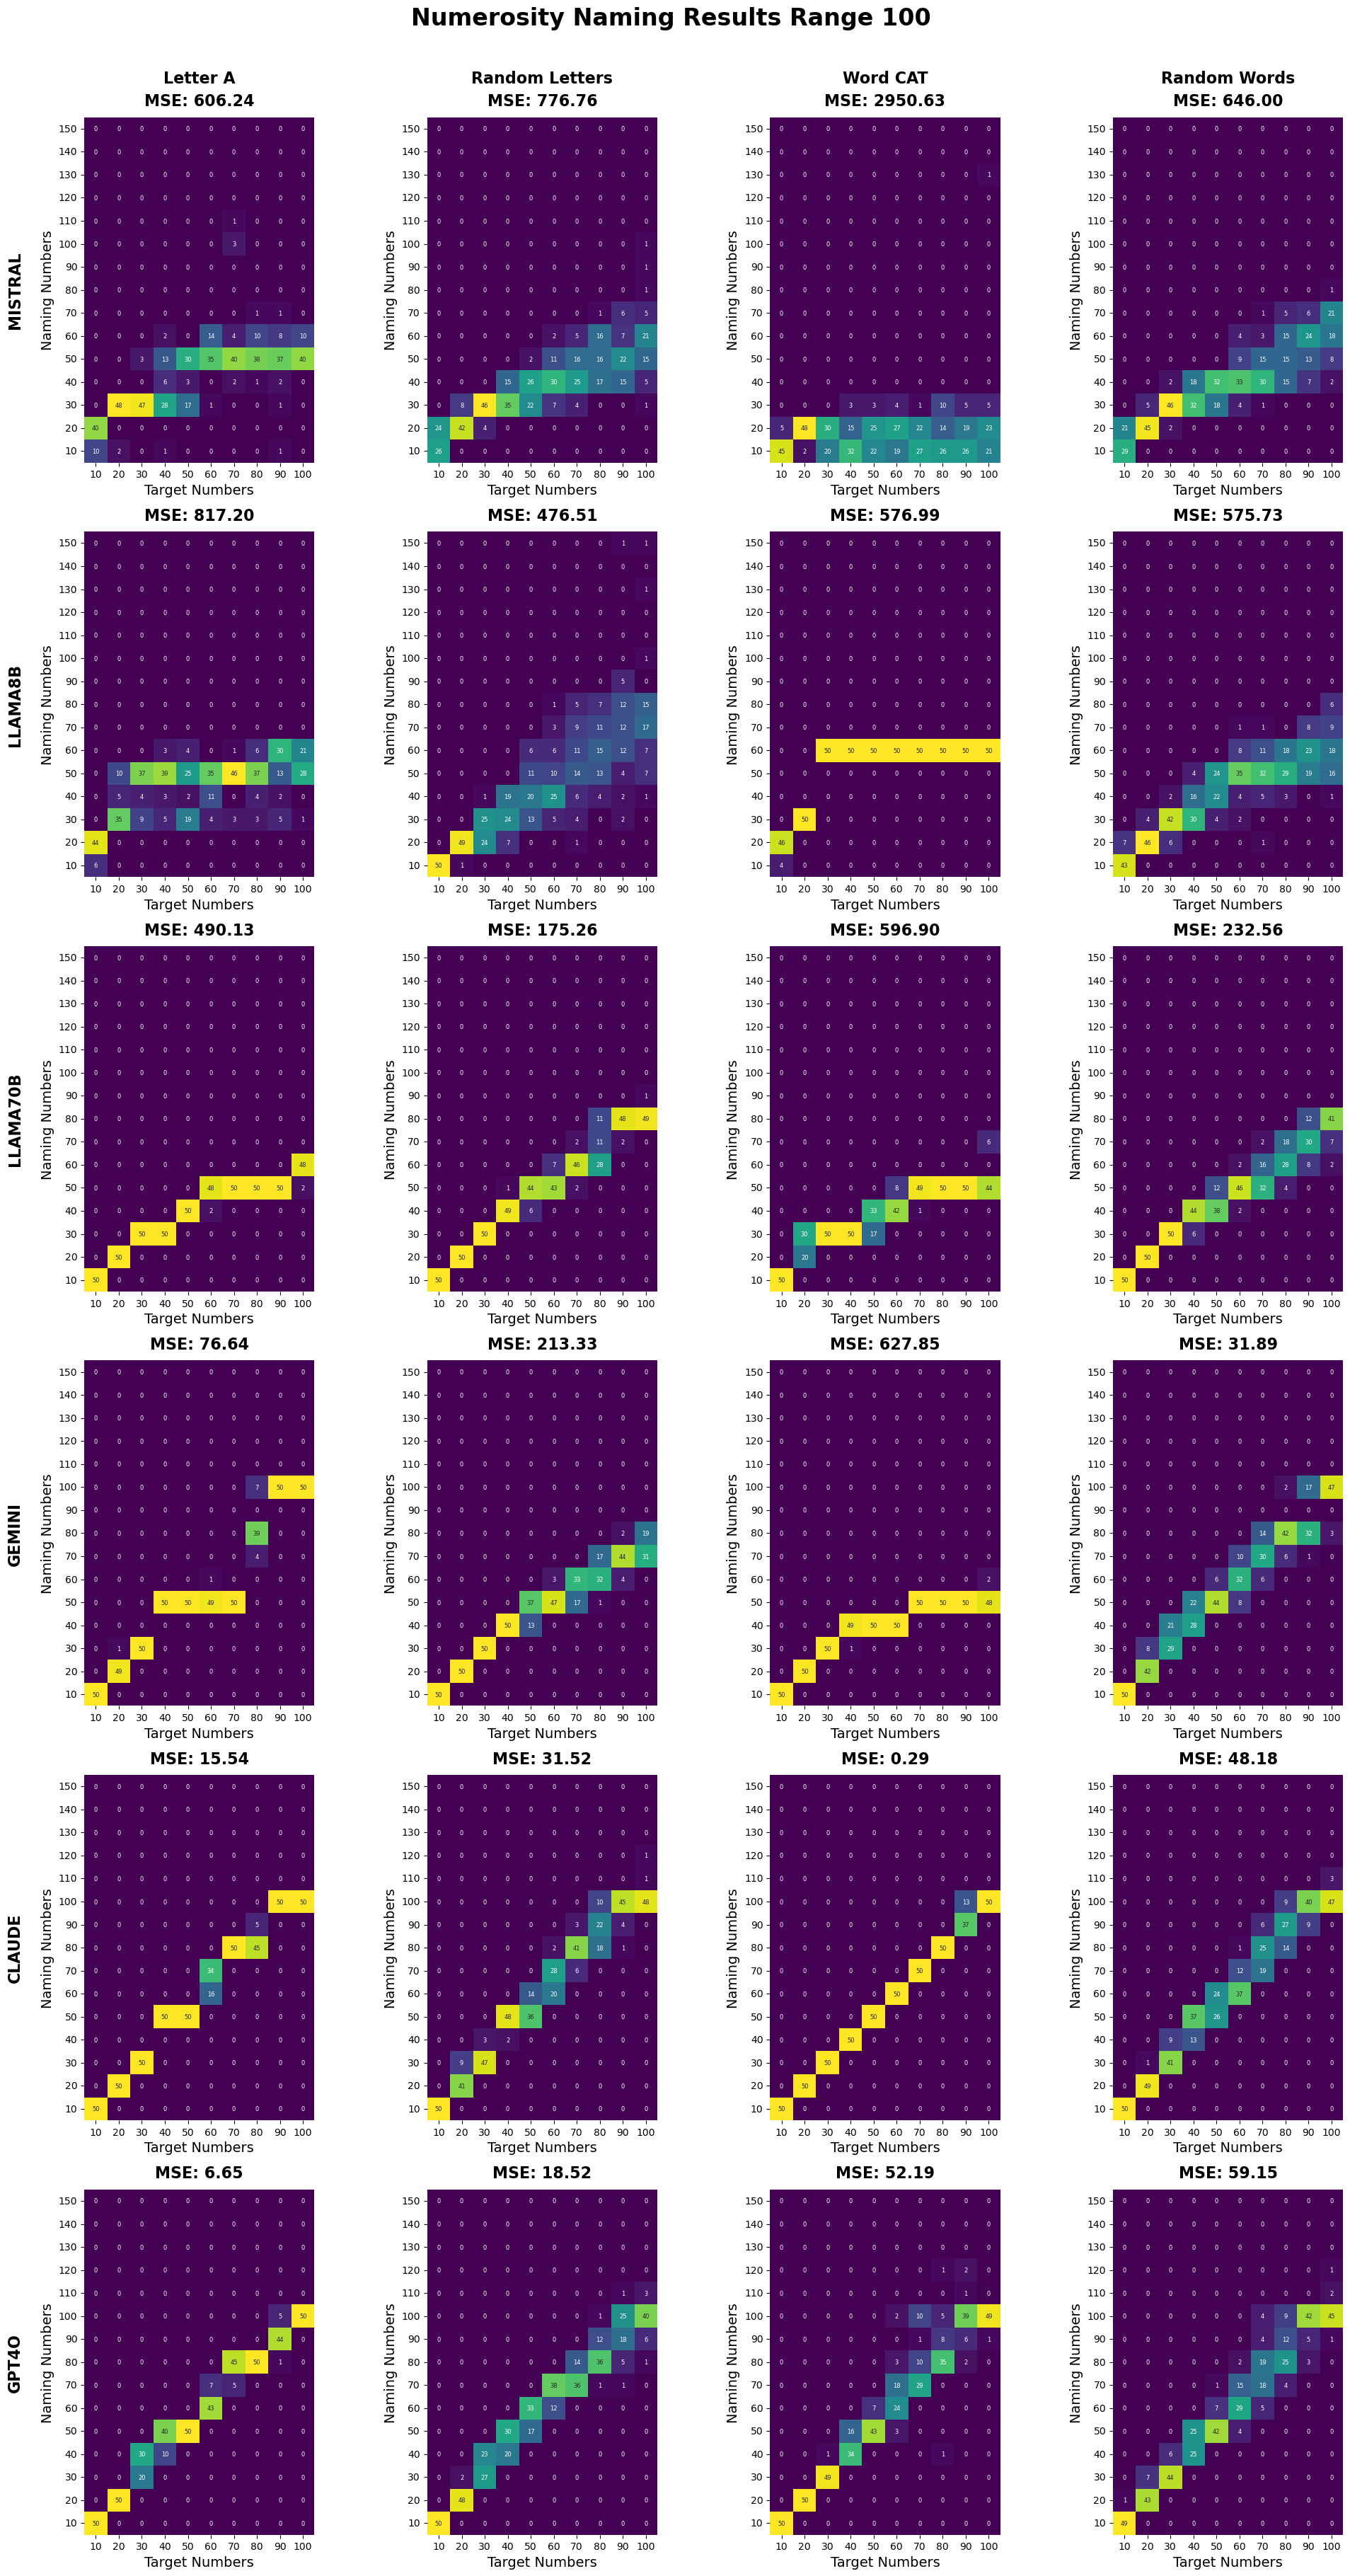

In [21]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# Define TASK_NAMES for annotation
TASK_NAMES = {
    0: "Letter A",
    1: "Random Letters",
    2: "Word CAT",
    3: "Random Words"
}

def create_binned_heatmap_data(file_path, x_bins=10, y_bins=10, x_max=100, y_max=150):
    """
    Process CSV file to bin heatmap data with x-axis starting at 1 and y-axis flipped.
    """
    data = pd.read_csv(file_path, index_col=0)

    # Define bin edges for x and y axes
    x_edges = np.arange(1, x_max + x_bins + 1, x_bins)  # Ensure x-axis starts at 1
    y_edges = np.arange(1, y_max + y_bins + 1, y_bins)  # Ensure y-axis starts at 1

    # Initialize a grid for heatmap data
    heatmap_data = np.zeros((len(y_edges) - 1, len(x_edges) - 1))

    # Collect all targets and predictions for MSE
    all_targets, all_predictions = [], []

    for col in data.columns:  # Iterate through targets
        col_values = data[col].dropna()
        target_number = int(col)

        # Add all data to MSE calculations
        all_targets.extend([target_number] * len(col_values))
        all_predictions.extend(col_values)

        # Filter and bin the data into the specified ranges for heatmap
        for value in col_values:
            if 1 <= target_number <= x_max and 1 <= value <= y_max:
                x_idx = np.digitize(target_number, x_edges) - 1
                y_idx = np.digitize(value, y_edges) - 1
                if x_idx < len(x_edges) - 1 and y_idx < len(y_edges) - 1:
                    heatmap_data[y_idx, x_idx] += 1

    overall_mse = mean_squared_error(all_targets, all_predictions) if all_targets else 0.0
    return heatmap_data, overall_mse, x_edges[:-1], y_edges[:-1]  # Return normal heatmap without flipping



def generate_combined_binned_heatmaps(input_directory, save_path):
    """
    Generate combined heatmap grid with models as rows and categories as columns, with binned data.
    """
    file_pattern = re.compile(r"([a-zA-Z0-9]+)_cat(\d+)_r100_naming_data.*\.csv")
    model_order = ["mistral", "llama8b", "llama70b", "gemini", "claude", "gpt4o"]
    categories = set()
    heatmap_results = {}

    for file in os.listdir(input_directory):
        if file.endswith(".csv") and "r10" in file:
            match = file_pattern.match(file)
            if match:
                model, cat = match.groups()
                category = int(cat)
                file_path = os.path.join(input_directory, file)
                heatmap_data, mse, x_edges, y_edges = create_binned_heatmap_data(file_path)

                if model not in heatmap_results:
                    heatmap_results[model] = {}
                heatmap_results[model][category] = (heatmap_data, mse, x_edges, y_edges)
                categories.add(category)

    categories = sorted(categories)
    models = [m for m in model_order if m in heatmap_results]
    num_rows, num_cols = len(models), len(categories)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(6 * num_cols, 6 * num_rows))

    for i, model in enumerate(models):
        for j, category in enumerate(categories):
            ax = axes[i, j] if num_rows > 1 else axes[j]
            if category in heatmap_results[model]:
                heatmap_data, mse, x_edges, y_edges = heatmap_results[model][category]

                sns.heatmap(heatmap_data[::-1], ax=ax, cmap="viridis", cbar=False,
                    xticklabels=[str(i) for i in range(10, 110, 10)],  # Directly show target numbers
                    yticklabels=[str(i) for i in range(150, 0, -10)],      # Flip y-axis labels directly
                    annot=True, fmt=".0f", annot_kws={"size": 6}, square=False)


                ax.set_box_aspect(1.5)
                ax.text(len(x_edges) // 2, -0.5, f"MSE: {mse:.2f}", ha="center", fontsize=16, fontweight="bold")
                ax.set_xlabel("Target Numbers", fontsize=14)
                ax.set_ylabel("Naming Numbers", fontsize=14)

            else:
                ax.axis("off")

    for ax, col in zip(axes[0], categories):
        ax.annotate(TASK_NAMES[col], xy=(0.5, 1.1), xycoords="axes fraction", 
                    ha="center", fontsize=16, fontweight="bold")
    for ax, row in zip(axes[:, 0], models):
        ax.annotate(row.upper(), xy=(-0.3, 0.5), xycoords="axes fraction", 
                    ha="center", va="center", rotation=90, fontsize=16, fontweight="bold")

    plt.suptitle("Numerosity Naming Results Range 100", fontsize=24, fontweight="bold", x=0.55, y=1.01)
    plt.tight_layout()
    plt.subplots_adjust(left=0.2, right=0.95, hspace=0.2, wspace=0.4)
    plt.savefig(save_path, bbox_inches="tight")
    print(f"Binned heatmap grid saved to {save_path}")
    plt.show()

# Run the updated main
if __name__ == "__main__":
    input_directory = r"C:\Users\Kaan\Desktop\thesis\csv_files"
    output_path = r"C:\Users\Kaan\Pictures\thesis\r100_naming_heatmap.png"
    generate_combined_binned_heatmaps(input_directory, output_path)


Violin plot grid saved to C:\Users\Kaan\Pictures\thesis\r10_naming_violin.png


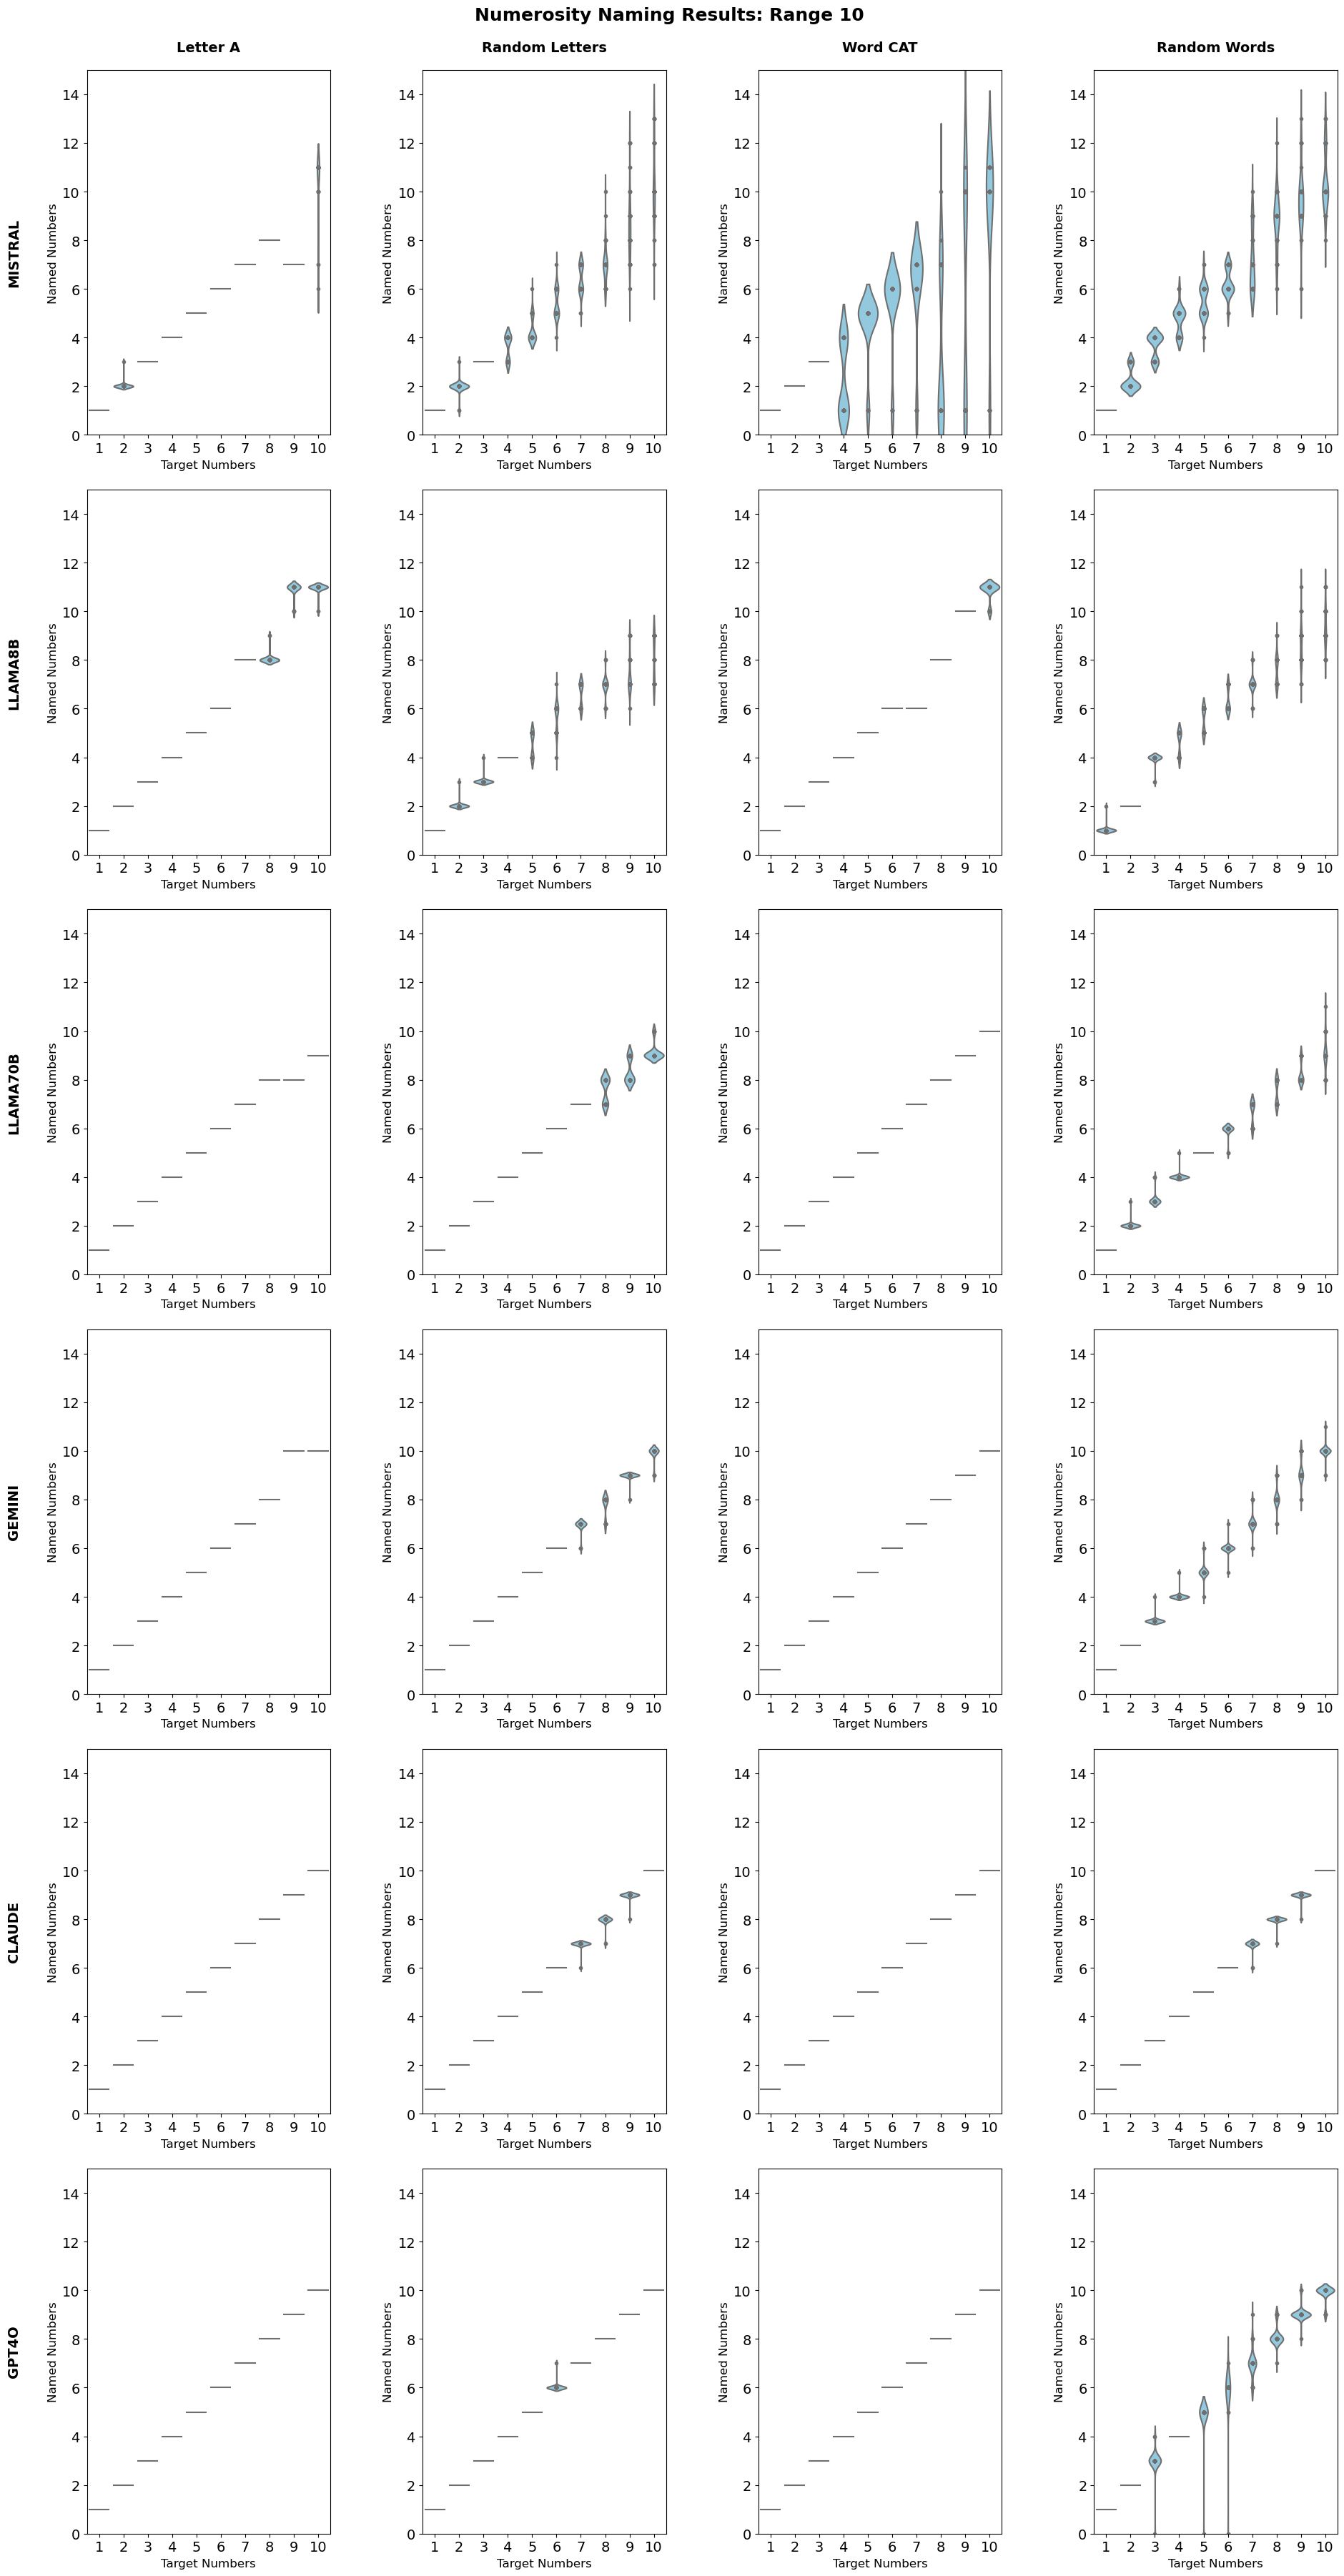

In [33]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

TASK_NAMES = {
    0: "Letter A",
    1: "Random Letters",
    2: "Word CAT",
    3: "Random Words"
}

def create_violin_plot_data(file_path):
    """
    Process CSV file to collect target and generated values for violin plots.
    Only include values less than 250.
    """
    data = pd.read_csv(file_path, index_col=0)
    violin_data = []
    for col in data.columns:  # Iterate through targets
        col_values = data[col].dropna()
        target_number = int(col)
        for value in col_values:
            if value < 15:  # Filter values less than 250
                violin_data.append({"Target": target_number, "Generated": value})
    return pd.DataFrame(violin_data)

def generate_combined_violin_plots(input_directory, save_path):
    """
    Generate combined violin plot grid with models as rows and categories as columns.
    Scale y-axis from 0 to 250.
    """
    file_pattern = re.compile(r"([a-zA-Z0-9]+)_cat(\d+)_r10_naming_data.*\.csv")
    model_order = ["mistral", "llama8b", "llama70b", "gemini", "claude", "gpt4o"]
    categories = set()
    violin_data_results = {}

    # Process all CSV files
    for file in os.listdir(input_directory):
        if file.endswith(".csv") and "r10" in file:
            match = file_pattern.match(file)
            if match:
                model, cat = match.groups()
                category = int(cat)
                file_path = os.path.join(input_directory, file)
                violin_data = create_violin_plot_data(file_path)

                if model not in violin_data_results:
                    violin_data_results[model] = {}
                violin_data_results[model][category] = violin_data
                categories.add(category)

    # Grid setup
    categories = sorted(categories)
    models = [m for m in model_order if m in violin_data_results]
    num_rows, num_cols = len(models), len(categories)

    # Dynamically calculate figure size to maximize plot size
    fig_width = 6 * num_cols
    fig_height = 6 * num_rows
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height), squeeze=False)

    for i, model in enumerate(models):
        for j, category in enumerate(categories):
            ax = axes[i, j]
            if category in violin_data_results[model]:
                df = violin_data_results[model][category]
                sns.violinplot(x="Target", y="Generated", data=df, ax=ax, inner="point", color="skyblue")
                ax.set_ylim(0, 15)  # Set y-axis scale from 0 to 250
                ax.set_box_aspect(1.5)  # Set the aspect ratio to 2
                ax.set_xlabel("Target Numbers", fontsize=12)
                ax.set_ylabel("Named Numbers", fontsize=12)
                ax.tick_params(axis='both', which='major', labelsize=14)
            else:
                ax.axis("off")

    for ax, col in zip(axes[0], categories):
        ax.annotate(TASK_NAMES.get(col, f"Category {col}"), xy=(0.5, 1.05), xycoords="axes fraction",
                    ha="center", fontsize=14, fontweight="bold")
    for ax, row in zip(axes[:, 0], models):
        ax.annotate(row.upper(), xy=(-0.3, 0.5), xycoords="axes fraction",
                    ha="center", va="center", rotation=90, fontsize=14, fontweight="bold")

    plt.suptitle("Numerosity Naming Results: Range 10", fontsize=18, fontweight="bold", x=0.55, y=1)
    plt.tight_layout()
    plt.subplots_adjust(left=0.2, right=0.95, hspace=0.15, wspace=0.2)
    plt.savefig(save_path, bbox_inches="tight")
    print(f"Violin plot grid saved to {save_path}")
    plt.show()

# Run the violin plot function
if __name__ == "__main__":
    input_directory = r"C:\Users\Kaan\Desktop\thesis\csv_files"
    output_path = r"C:\Users\Kaan\Pictures\thesis\r10_naming_violin.png"
    generate_combined_violin_plots(input_directory, output_path)
